<a href="https://colab.research.google.com/github/HST0077/HYOTC/blob/main/%EB%8B%A4%EB%B3%80%EB%9F%89%EC%A0%95%EA%B7%9C%EB%B6%84%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **확률변수 X는 평균 5, 표준편차 2인 정규분포를 따른다. X의 확률밀도함수의 그래프와 누적확률분포를 그려보아라**

In [1]:
# sympy 이용
from sympy.stats import Normal, E, variance

X=Normal('X',5,2) # 확률변수 설정
E(X) # 평균

5

In [2]:
variance(X) # 분산

4

In [4]:
# pdf 함수 살펴보기
from sympy import symbols
from sympy.stats import density

x=symbols('x')
density(X)(x)

sqrt(2)*exp(-(x - 5)**2/8)/(4*sqrt(pi))

In [5]:
# μ,σ를 갖는 정규분포의 pdf 보기
mu,sigma,y=symbols('μ σ y')
Y=Normal('Y',mu,sigma) # 확률변수 설정
density(Y)(y)

sqrt(2)*exp(-(y - μ)**2/(2*σ**2))/(2*sqrt(pi)*σ)

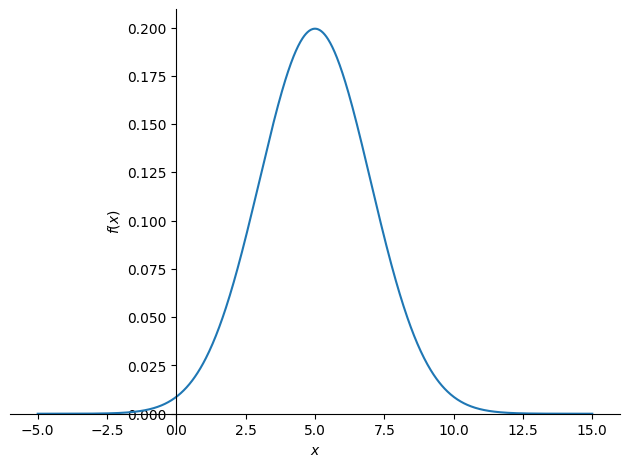

In [7]:
# pdf 그래프 그리기
from sympy import plot
plot(density(X)(x),(x,-5,15))

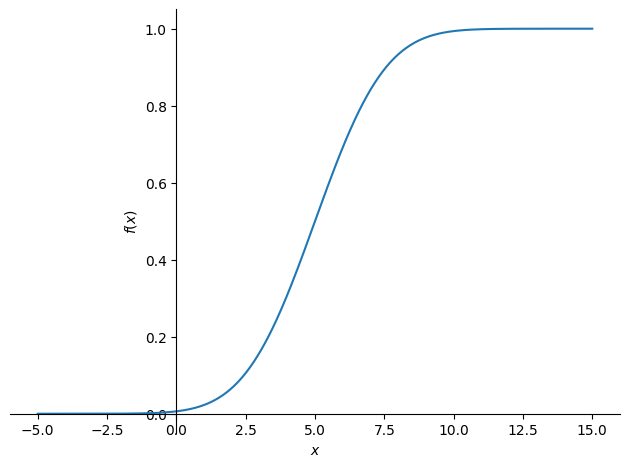

In [9]:
# cdf 그래프 그리기
from sympy.stats import cdf
plot(cdf(X)(x),(x,-5,15))

In [15]:
# 정규분포 난수 생성 by sympy
from sympy.stats import sample, Normal

X=Normal('X',5,2) # 확률변수 설정

sample(X,size=10000) # X~N(5,4)를 따르는 정규분포 난수

array([5.88976618, 4.86376173, 7.94174545, ..., 4.19210556, 7.74773446,
       4.5839035 ])

In [16]:
# sample 자료 검증
from scipy.stats import norm
D0=sample(X,size=10000) # X~N(5,4)를 따르는 정규분포 난수
a,b=norm.fit(D0)
print('평균:{0},표준편차:{1}'.format(a,b))

평균:5.019553682536965,표준편차:1.9928980553409772


In [18]:
# 정규분포 난수 생성 by numpy
import numpy as np

D2=np.random.normal(5,2,10000) # X~N(5,4)를 따르는 정규분포 난수

a,b=norm.fit(D1)
print('평균:{0},표준편차:{1}'.format(a,b))

평균:4.97369350337985,표준편차:2.016248332704177


In [17]:
# 정규분포 난수 생성 by scipy
from scipy.stats import norm

D1=norm.rvs(5,2,size=10000) # X~N(5,4)를 따르는 정규분포 난수
a,b=norm.fit(D1)
print('평균:{0},표준편차:{1}'.format(a,b))

평균:4.97369350337985,표준편차:2.016248332704177


In [19]:
# 정규분포 확률 구하기
from sympy.stats import P

P(X<=5)

1/2

In [22]:
# 정규분포 확률변수 값 구하기
from sympy import solve
from sympy.stats import cdf

a=symbols('a')
solve(cdf(X)(a)-0.5,a)

[5]

In [23]:
# scipy를 이용한 확률과 확률변수 값
from scipy.stats import norm

mu = 5        # 평균
sigma = 2     # 표준편차

norm.cdf(5,mu,sigma) #확률값

np.float64(0.5)

In [25]:
norm.ppf(0.5,mu,sigma) #확률변수값

np.float64(5.0)

# **다변량정규분포**

In [1]:
from sympy import *
from sympy.stats import *
n=symbols('n',integer=True,positive=True)
mu=MatrixSymbol('mu',n,1) # n by 1 기대값 행렬
Sg=MatrixSymbol('Sg',n,n) # n by n 공분산행렬
x=MatrixSymbol('x',n,1) # 확률변수 벡터
X=MultivariateNormal('X',mu,Sg) # multivarite normal 분포 설정
density(X)(x)

(exp(((1/2)*mu.T - (1/2)*x.T)*Sg**(-1)*(-mu + x))/sqrt((2*pi)**n*Determinant(Sg)))[0, 0]

In [4]:
from sympy import *
from sympy.stats import *
# Bivariate Normal: 서로 독립인 이변량 표준정규분포
X=MultivariateNormal('X',[0,0],[[1,0],[0,1]]) # 첫번째는 평균, 두번째는 공분산행렬
x1,x2=symbols('x1 x2')
density(X)(x1,x2)

exp(-x1**2/2 - x2**2/2)/(2*pi)

In [3]:
marginal_distribution(X,X[0])(x1) # marginal distribution

sqrt(2)*exp(-x1**2/2)/(2*sqrt(pi))

In [5]:
marginal_distribution(X,X[1])(x2) # marginal distribution

sqrt(2)*exp(-x2**2/2)/(2*sqrt(pi))

# **다변량 정규분포의 난수 생성**

In [1]:
# multivariate normal random samples by numpy
import numpy as np
from numpy.random import multivariate_normal
mean=[0,0,0]
cov=[[1,-0.2,-0.3],[-0.2,1,0.9],[-0.3,0.9,1]]
D0=multivariate_normal(mean=mean,cov=cov,size=1000)
D0.shape

(1000, 3)

In [2]:
import pandas as pd
D1=pd.DataFrame(data=D0,columns=['A','B','C'])
D1.describe()

,A,B,C
count,1000.000000,1000.000000,1000.000000
mean,-0.001096,0.028443,0.001545
std,0.989469,1.001030,0.994582
min,-3.624867,-3.160888,-3.538029
25%,-0.708865,-0.635100,-0.670430
50%,0.005891,0.028145,0.007184
75%,0.728273,0.751767,0.715694
max,2.792172,3.390629,2.868695


In [3]:
D1.corr()

,A,B,C
A,1.000000,-0.180395,-0.264317
B,-0.180395,1.000000,0.898773
C,-0.264317,0.898773,1.000000


In [8]:
# multivariate normal random samples by scipy
# numpy에 비해 더 수학적이고 통계적 분석 기능을 제공 (pdf, logpdf, cdf 등 계산은 scipy에서만 가능)
import numpy as np
from scipy.stats import multivariate_normal

# 평균벡터 & 공분산행렬
mean = [0, 0, 0]
cov  = [[1, -0.2, -0.3],
        [-0.2, 1, 0.9],
        [-0.3, 0.9, 1]]

# scipy.stats.multivariate_normal 객체 생성
rv = multivariate_normal(mean=mean, cov=cov)

# 샘플 1000개 생성
D2 = rv.rvs(size=10000)
D2.shape

(10000, 3)

In [9]:
import pandas as pd
D2=pd.DataFrame(data=D2,columns=['A','B','C'])
D2.describe()

,A,B,C
count,10000.000000,10000.000000,10000.000000
mean,0.005194,0.014377,0.011340
std,0.995155,1.020154,1.009821
min,-3.687256,-3.515650,-3.964656
25%,-0.675777,-0.676690,-0.652351
50%,-0.001720,0.018667,0.005183
75%,0.675643,0.698704,0.704845
max,3.696525,3.462327,3.522788


In [10]:
D2.corr()

,A,B,C
A,1.000000,-0.194945,-0.300356
B,-0.194945,1.000000,0.901935
C,-0.300356,0.901935,1.000000


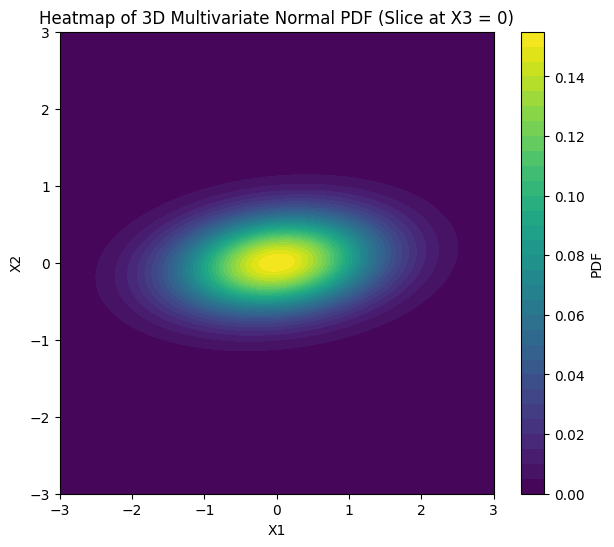

In [12]:
# joint prob. 바탕으로 Heatmap 그리기
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------
# Make grid (for X1, X2), fix X3 = 0
# -----------------------------------------
x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)

# (X, Y, 0) 을 결합 → shape (200,200,3)
# dstack 함수는 2D 배열을 쌓아서 3D 배열로 만드는 함수
pos = np.dstack((X, Y, np.zeros_like(X)))

# -----------------------------------------
# Evaluate joint pdf on the grid
# -----------------------------------------
Z = rv.pdf(pos)  # shape (200,200)

# -----------------------------------------
# Plot heatmap
# -----------------------------------------
plt.figure(figsize=(7,6))
plt.contourf(X, Y, Z, levels=30, cmap='viridis')
plt.colorbar(label="PDF")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Heatmap of 3D Multivariate Normal PDF (Slice at X3 = 0)")
plt.show()